#### COMPANION WORKBOOK

# Adding Complexity

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Curves and Complexity

In [1]:
# import all modules required
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression

In [3]:
# import the dataset

df = pd.read_csv('simulated_data_csv')

# inspect the head

df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


## II. Polynomial Regression

In [4]:
# implementing the formula for the second order polynomial ŷ =β0+β1x+β2x2

# make a copy of df

df_copy = df.copy()

# create the x raised to power 2 feature

df_copy['x2'] = np.power(df_copy['x'], 2)

df_copy.head()

,x,y,x2
0,0.000000,0.086260,0.000000
1,0.063467,0.881165,0.004028
2,0.126933,0.145261,0.016112
3,0.190400,-0.252824,0.036252
4,0.253866,-0.320448,0.064448


In [6]:
# fit the second order polynomial

lm = LinearRegression()

target = df_copy.y
features = df_copy.drop('y', axis=1)


lm.fit(features, target)


LinearRegression()

In [7]:
# display coefficient and intercept

print(lm.intercept_)
print(lm.coef_)

0.7407206071842419
[-0.18752794 -0.01276576]


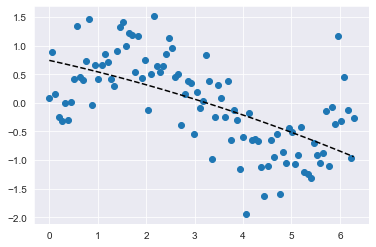

In [8]:
# Evaluating the plot visually

plt.scatter(df_copy.x, df_copy.y)

plt.plot(df_copy.x, lm.predict(features), 'k--')

plt.show()

## III. Helper Functions


In [9]:
# making our model flexible
# how to add more polynomial terms dynamically by creating this: ŷ =β0+β1x+β2x2+β3x3
# and helper function

def fit_and_plot_model(data_frame, model):
    # split data frame into features & target
    target = data_frame.y
    features = data_frame.drop('y', axis=1)
    
    model.fit(features, target)
    plt.scatter(data_frame.x, data_frame.y)
    plt.plot(data_frame.x, model.predict(features), 'k--')
    
    return model

LinearRegression()

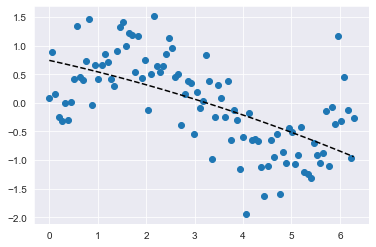

In [10]:
fit_and_plot_model(df_copy, LinearRegression())

In [11]:
def fit_and_plot_polynomial(df, model, polynomial_order):
    # create a copy of data frame
    df_copy = df.copy()
    
    # if polynomial_order is one 
    if polynomial_order == 1:
        model = fit_and_plot_model(df_copy, model)
    else:
        for power in range(2, polynomial_order + 1):
            df_copy['x{}'.format(power)] = np.power(df_copy.x, power)
        model = fit_and_plot_model(df_copy, model)
    return model

LinearRegression()

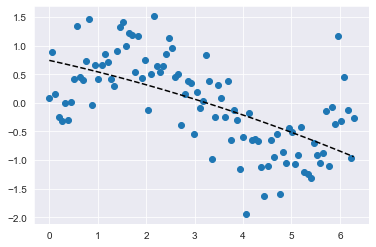

In [12]:
fit_and_plot_polynomial(df, LinearRegression(), 2)

## IV. Higher-Order Polynomials


LinearRegression()

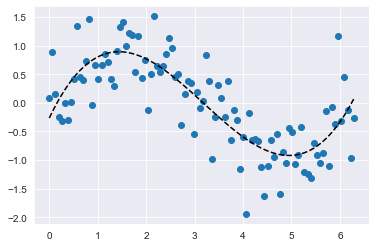

In [13]:
# plotting a 3rd order polynomial regression

fit_and_plot_polynomial(df, LinearRegression(), 3)

LinearRegression()

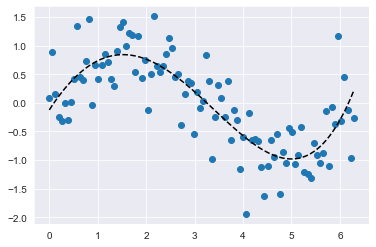

In [14]:
# plotting a 3rd order polynomial regression

fit_and_plot_polynomial(df, LinearRegression(), 4)

LinearRegression()

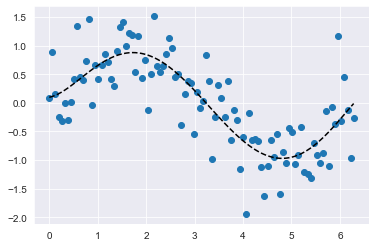

In [16]:
# plotting a 3rd order polynomial regression

fit_and_plot_polynomial(df, LinearRegression(), 5)

LinearRegression()

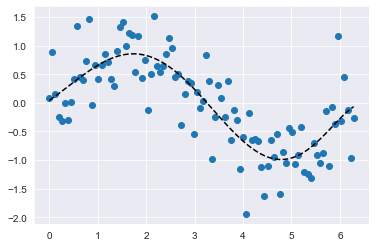

In [17]:
# plotting a 3rd order polynomial regression

fit_and_plot_polynomial(df, LinearRegression(), 6)

LinearRegression()

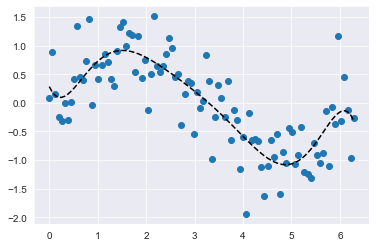

In [18]:
# plotting a 3rd order polynomial regression

fit_and_plot_polynomial(df, LinearRegression(), 7)

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

#### First, remember to import the relevant libraries and set the theme (if you haven't done so already).

## <span style="color:RoyalBlue">Exercise 3.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

This one is a perfect example. In the online Coding Section (which you should have followed in the workbook space above), we wrote a few helper functions for fitting and plotting models. So let's just fully double-check that we're on the same page and that you've written those helper functions successfully.

#### A.) Import <code>'simulated_data.csv'</code> that you created during the follow-along coding section and display the first 5 observations.

<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>0.086260</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.063467</td>
      <td>0.881165</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.126933</td>
      <td>0.145261</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.190400</td>
      <td>-0.252824</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.253866</td>
      <td>-0.320448</td>
    </tr>
  </tbody>
</table>

#### B.) Fit and plot a 20th-order polynomial regression.
* What can you conclude about the model? Is it what you expected?

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="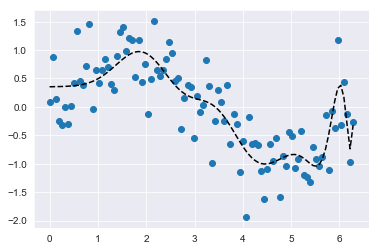&#10;">

## <span style="color:RoyalBlue">Exercise 3.2 - False Complexity</span>

In the Coding Section for this module, we discovered that (at least based on a quick eyeball test), a third-order polynomial regression seems to do the best job of learning the underlying sine wave signal. But here's an interesting question... do you think the right complexity level is due to having BOTH $\beta_2 x^2 + \beta_3 x^3$ or simply increasing our highest polynomial term up to $\beta_3 x^3$?

In other words, instead of:

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$

What if we cut out the $x^2$ term and just jump directly to a model like so:

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^3$

Would that work? Well... let's see! Yes, we could just "tell you" from a theory standpoint, but it's going to be much more illuminating to discover the answer for yourself, right? That's the huge advantage of coding alongside as you learn, so let's use it.

#### A.) Fit and plot a model based on $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^3$.
* Tip: We recommend making a copy of <code>df</code>, directly preparing your input features in the copy dataframe, and then passing it into <code>fit_and_plot_model()</code> (instead of <code>fit_and_plot_polynomial_model()</code>). All in all, it would only take 3 lines of code.
* What do you notice? Is it what you expected?

In [ ]:
# Make a copy of df


# Engineer x^3 feature


# Fit and plot model


<strong style="color:RoyalBlue">Expected output:</strong>

<img src="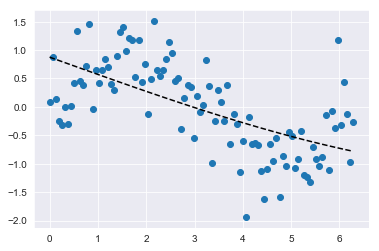&#10;">

As it turns out, it looks like cutting the $x^2$ term was fatal for the model. Hmm... interesting... But just to be completely sure, let's bump up the polynomial term even more.

#### B.) Let's bump the polynomial term way up. Fit and plot a model with only $x$ and $x^{30}$ as input features.
* In other words, your model should be:

> $\hat{y} = \beta_0 + \beta_1 x + \beta_{2} x^{30}$

* What do you notice? Does bumping the polynomial term way up help the model at all?

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="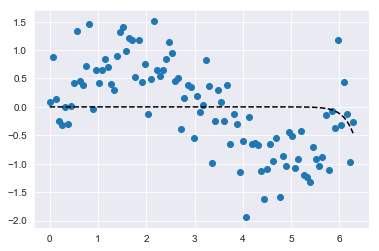&#10;">

As it turns out, what's really going on is that adding higher and higher polynomial terms does not increase the model complexity/flexibility by itself. This is a very important concept to take away. When we say "model complexity," we are NOT talking about how "fancy" the input features are. Instead, at least within the scope of one family of models (e.g. linear or polynomial regressions) we are talking about:
1. The **number** of model parameters and...
2. Their **effectiveness** in expressing relationships within your dataset.

Let's break that down, starting with the first factor.

#### Complexity Factor \#1 - The Number of Model Parameters

The reason that

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$

performed better than

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^3$

or

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^{30}$

is not due to the $x^2$ polynomial term per se, but rather the fact that it allows *one additional model parameter* $\beta_3$, even though the $x^2$ and $x^3$ terms are actually meaningless from a real-world standpoint.

For example, imagine a real-world dataset where $x$ represents time of day and $y$ represents the foot traffic of various local shops...

In that case, $x^2$ would be the "square of the time of day," which is pretty meaningless. You've probably had many people ask you "hey, do you know what time it is?" But how many people have ever asked you "hey, do you know the square of the time right now?"

However, as it turns out, $x^2$ is not so meaningless from our model's perspective because it allows our model to express the underlying $x$ vs. $y$ relationship with one additional model parameter.

To illustrate this point, let's fit another model with 2 non-sequential polynomial terms.

#### C.) Fit and plot a model with $x$, $x^3$, and $x^5$ as input features.
* In other words, your model should be:

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^3 + \beta_3 x^5$

* What do you notice?

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="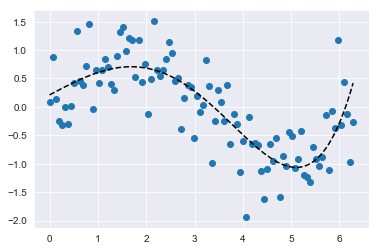&#10;">

Let's explore the other complexity factor in the next exercise.

## <span style="color:RoyalBlue">Exercise 3.3 - Bigger, but Not Better</span>

In addition to the **quantity** of model parameters, we also need to consider the **quality** of those parameters. In other words, do those parameters actually contribute anything meaningful for dealing with this particular dataset?

#### Complexity Factor \#2 - Model Parameter Effectiveness

From the previous exercise, remember how:

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^3 + \beta_3 x^5$

performed quite well because of the additional model parameter $\beta_3$? Well, what happens if we try to turn $\beta_3 x^5$ all the way up to $\beta_3 x^{30}$? Do you think the model would be better or worse?


#### A.) Fit and plot a model with $x$, $x^3$, and $x^{30}$ as input features.
* In other words, your model should be:

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^3 + \beta_3 x^{30}$

* This time, save your fitted model into an <code>lm</code> object. We'll be using it later. Hint: <code>lm = fit_and_plot_model(df_copy, LinearRegression())</code>
* What do you notice?

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="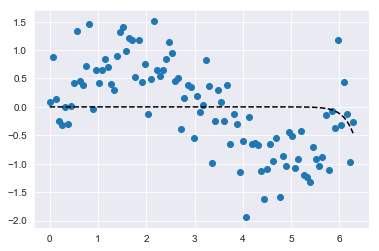&#10;">

Why is that? Let's dive a little deeper.

#### B.) Print the coefficients of your model.
* What do you notice about the coefficient $\beta_2$?

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[-3.23600222e-48  0.00000000e+00 -5.24982874e-25]
</pre>

As you can see, the coefficient $\beta_2$ was suppressed all the way down to zero. Something suspicious is going on. Let's investigate.

#### C.) Display the first 5 and last 5 rows of your dataframe.
* What do you notice about the $x^{30}$ input feature? What kind of effect do you think this has on the actual model?

As you can see, the $x^{30}$ input feature is on a completely different (and blown up) **scale** than everything else. That makes sense. After all, when you take the 30th power of numbers, you'll get some extreeeeemely small numbers and some extreeeeemely large numbers.

As a result, when the input features are on such drastically different scales, **the feature on the larger scale ends up dominating the one on the smaller scale.** That's why you see $\beta_2$, the coefficient for $x^3$ getting pushed to zero... it's because $x^{30}$ is on such a larger scale.

Unfortunately, $x^{30}$ being on such a large scale is NOT a good thing for our model. Remember, we are trying to model the relationship between $x$ and $y$. So the input feature $x^{30}$ being on such a large scale actually just ends up being noise. Its coefficient $\beta_3$ ends up virtually meaningless because $x^{30}$ swings so dramatically in relation to $y$.

#### D.) Alright, let's see if we can salvage this model though. Overwrite the input features $x^3$ and $x^{30}$ with versions that are *normalized* (i.e. scaled to be between 0 and 1).
* The formula for normalizing data is:

> $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$

* In other words, subtract the minimum feature value from each value, then divide each by the range.
* Tip: What happens if $x_{min} = 0$? Does $x_{min} = 0$ for our input features $x^3$ and $x^10$?

*If $x_{min} = 0$, the formula for normalizing data becomes*

> $x_{new} = \dfrac{x - 0}{x_{max} - 0} = \dfrac{x}{x_{max}}$

*And both $min(x^3) = 0$ and $min(x^{30}) = 0$.*

#### E.) As a quick sanity check, call the <code>.describe()</code> function of your dataframe. You should see $x^3$ and $x^{30}$ now scaled to be between 0 and 1.

<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
      <th>x3</th>
      <th>x30</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>100.000000</td>
      <td>100.000000</td>
      <td>100.000000</td>
      <td>1.000000e+02</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>3.141593</td>
      <td>-0.017255</td>
      <td>0.252525</td>
      <td>3.718766e-02</td>
    </tr>
    <tr>
      <th>std</th>
      <td>1.841258</td>
      <td>0.793495</td>
      <td>0.289042</td>
      <td>1.433676e-01</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.000000</td>
      <td>-1.940613</td>
      <td>0.000000</td>
      <td>0.000000e+00</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>1.570796</td>
      <td>-0.638436</td>
      <td>0.015639</td>
      <td>9.655822e-19</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>3.141593</td>
      <td>-0.021025</td>
      <td>0.125038</td>
      <td>9.729240e-10</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>4.712389</td>
      <td>0.535641</td>
      <td>0.421918</td>
      <td>1.814041e-04</td>
    </tr>
    <tr>
      <th>max</th>
      <td>6.283185</td>
      <td>1.511720</td>
      <td>1.000000</td>
      <td>1.000000e+00</td>
    </tr>
  </tbody>
</table>

#### F.) Finally, fit and plot the model with input features of $x$ and your newly normalized $x^3$ and $x^{30}$.

* In other words, your model should be:

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^3_{norm} + \beta_3 x^{30}_{norm}$

* What do you notice?

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="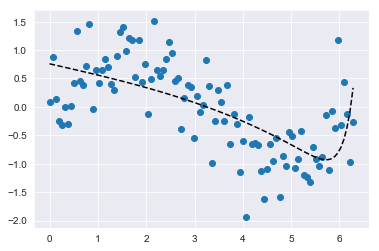&#10;">

## <span style="color:RoyalBlue">Exercise 3.4 - Noisy Tangent vs. Polynomial Regressions</span>

Great job so far. Finally, just as in the previous module's workbook, let's revisit the noisy tangent simulated dataset. Let's replicate the polynomial regression models from this module on our noisy tangent dataset.

#### A.) First, read in the <code>'simulated_tangent_data.csv'</code> you saved from the previous module into a <code>tangent_df</code> dataframe. Then display the first 5 rows for a quick sanity check.

<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>0.086260</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.063467</td>
      <td>0.881293</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.126933</td>
      <td>0.146287</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.190400</td>
      <td>-0.249341</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.253866</td>
      <td>-0.312132</td>
    </tr>
  </tbody>
</table>

#### B.) Next, just as a refresher, fit and plot a simple linear regression on the noisy tangent dataset.
* Tip: You already have the helper function(s) needed for this.
* Set the y-axis limits to be from -5 to 5. (Tip: You can do this *after* calling your helper function. You don't need to modify your helper function.)

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="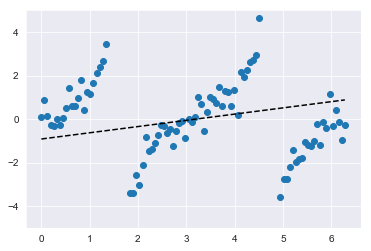&#10;" class="unconfined">

#### C.) Fit and plot a standard 2nd-order polynomial regression on the noisy tangent dataset.
* Tip: You already have the helper function(s) needed for this.

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2$


#### D.) Fit and plot a standard 3rd-order polynomial regression on the noisy tangent dataset.

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$


#### E.) Fit and plot a 5th-order polynomial regression on the noisy tangent dataset.

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4 + \beta_5 x^5$

#### F.) Fit and plot a 10th-order polynomial regression on the noisy tangent dataset.

> $\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_{9} x^{9} + \beta_{10} x^{10}$

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="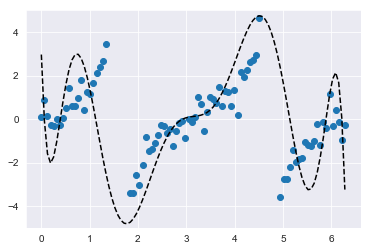&#10;">

#### G.) What do you notice about the models as you increase the order of the polynomial regression? What does this have to do with model complexity/flexibility?